In [ ]:
import pandas as pd
import numpy as np

# BASE_DIR="/home/cornaca/uview/results/IPU-22042025/"
BASE_DIR="/home/cornaca/uview
PAPER_DIR = '/home/cornaca/uview/64325fe5790118c5c152d25b/figures/plots/'
# PAPER_DIR=BASE_DIR

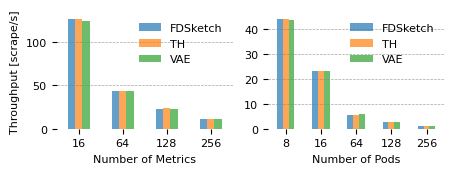

In [18]:
# Load the CSV data
metrics_df = pd.read_csv(BASE_DIR + 'prometheus_scrape_vs_metrics.csv')
pods_df = pd.read_csv(BASE_DIR + 'prometheus_scrape_vs_pods.csv')

# sort by num_metrics and num_pods
metrics_df.sort_values(by='num_metrics', inplace=True)
pods_df.sort_values(by='num_pods', inplace=True)

# change algorithm FD into FDSketch
metrics_df['algorithm'] = metrics_df['algorithm'].replace({'FD': 'FDSketch'})
pods_df['algorithm'] = pods_df['algorithm'].replace({'FD': 'FDSketch'})

import matplotlib.pyplot as plt
# set publication style with light axis frame
# plt.style.use('seaborn-v0_8-whitegrid')  # Updated style name for newer matplotlib versions

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['font.size'] = 8
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 8
# reduce label size
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8



# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 1.5))


# Plot for metrics
metrics_pivot = metrics_df.pivot(index='num_metrics', columns='algorithm', values='requests_per_sec').reset_index()
metrics_pivot.plot(x='num_metrics', kind='bar', ax=ax1, alpha=0.7, rot=0)

# Plot for pods
pods_pivot = pods_df.pivot(index='num_pods', columns='algorithm', values='requests_per_sec').reset_index()
pods_pivot.plot(x='num_pods', kind='bar', ax=ax2, alpha=0.7, rot=0)

# Configure the metrics plot
# ax1.set_title('Scrape Rate vs Number of Metrics')
ax1.set_xlabel('Number of Metrics')
ax1.set_ylabel('Throughput [scrape/s]')
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.spines["left"].set_visible(False) 
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

# Configure the pods plot
# ax2.set_title('Scrape Rate vs Number of Pods')
ax2.set_xlabel('Number of Pods')
# ax1.set_ylabel('Throughput [Scrapes/s]')
ax2.legend()
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.spines["left"].set_visible(False) 
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

# set super title
# fig.suptitle('Prometheus Scrape Rate', fontsize=12)

# Save the figure
fig.savefig(f'{PAPER_DIR}/prom_tput_ipu.png', dpi=300, bbox_inches='tight', pad_inches=0.)
fig.savefig(f'{PAPER_DIR}/prom_tput_ipu.pdf', dpi=300, bbox_inches='tight', pad_inches=0.)

# plt.tight_layout()
plt.show()

Plot only FD sketch and two separate subfigures

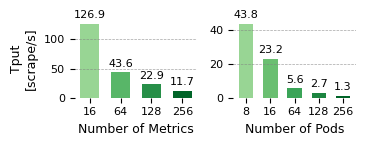

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# BASE_DIR="/home/cornaca/uview/results/IPU-22042025/"
BASE_DIR="/home/cornaca/uview
ylabel = 'Tput\n[scrape/s]'
figsize=(2, 1.5)
subplots = True

# Load the CSV data
metrics_df = pd.read_csv(BASE_DIR + 'prometheus_scrape_vs_metrics.csv')
pods_df = pd.read_csv(BASE_DIR + 'prometheus_scrape_vs_pods.csv')

# sort by num_metrics and num_pods
metrics_df.sort_values(by='num_metrics', inplace=True)
pods_df.sort_values(by='num_pods', inplace=True)

# change algorithm FD into FDSketch
metrics_df['algorithm'] = metrics_df['algorithm'].replace({'FD': 'FDSketch'})
pods_df['algorithm'] = pods_df['algorithm'].replace({'FD': 'FDSketch'})

# Filter to only include FDSketch algorithm
metrics_df = metrics_df[metrics_df['algorithm'] == 'FDSketch']
pods_df = pods_df[pods_df['algorithm'] == 'FDSketch']

# Set publication style with light axis frame
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

# FIGURE 1: Metrics plot

if not subplots:
    plt.figure(figsize=figsize, dpi=300)
else:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(3.7, 1.5))

# ax1 = plt.gca()

# Generate color gradient (different transparency levels of green)
num_metrics = len(metrics_df['num_metrics'].unique())
greens = plt.cm.Greens(np.linspace(0.4, 0.9, num_metrics))

# Plot metrics with custom bar style
x_pos = np.arange(num_metrics)
values = []

for i, (metric_val, group) in enumerate(metrics_df.groupby('num_metrics')):
    value = group['requests_per_sec'].values[0]
    values.append(value)
    bar = ax1.bar(i, value, color=greens[i], width=0.6)
    
    # Add value label on top of bar
    ax1.text(i, value + 0.05*max(values) if values else value, 
             f"{value:.1f}", ha='center', va='bottom', fontsize=8)

# Configure the metrics plot
ax1.set_xlabel('Number of Metrics', fontsize=9)
ax1.set_ylabel(ylabel, fontsize=9)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(sorted(metrics_df['num_metrics'].unique()))
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

# Set y-axis to start from 0
ax1.set_ylim(bottom=0)

# # Save the metrics figure
if not subplots:
    plt.tight_layout()
    plt.savefig(f'{BASE_DIR}/prom_tput_metrics.png', dpi=300, bbox_inches='tight', pad_inches=0.)
    plt.savefig(f'{BASE_DIR}/prom_tput_metrics.pdf', dpi=300, bbox_inches='tight', pad_inches=0.)
    plt.savefig(f'{PAPER_DIR}/prom_tput_metrics.pdf', dpi=300, bbox_inches='tight', pad_inches=0.)
    plt.show()

# FIGURE 2: Pods plot 
    plt.figure(figsize=figsize, dpi=300)
    ax2 = plt.gca()

# Generate color gradient (different transparency levels of green)
num_pods = len(pods_df['num_pods'].unique())
greens = plt.cm.Greens(np.linspace(0.4, 0.9, num_pods))

# Plot pods with custom bar style
x_pos = np.arange(num_pods)
values = []

for i, (pod_val, group) in enumerate(pods_df.groupby('num_pods')):
    value = group['requests_per_sec'].values[0]
    values.append(value)
    bar = ax2.bar(i, value, color=greens[i], width=0.6)
    
    # Add value label on top of bar
    ax2.text(i, value + 0.05*max(values) if values else value, 
             f"{value:.1f}", ha='center', va='bottom', fontsize=8)

# Configure the pods plot
ax2.set_xlabel('Number of Pods', fontsize=9)
# ax2.set_ylabel(ylabel, fontsize=9)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(sorted(pods_df['num_pods'].unique()))
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.spines["left"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

# Set y-axis to start from 0
ax2.set_ylim(bottom=0)

# Save the pods figure
if not subplots:
    name = 'prom_tput_pods'
else:
    name = 'prom_tput_both'
plt.tight_layout()
plt.savefig(f'{BASE_DIR}/{name}.png', dpi=300, bbox_inches='tight', pad_inches=0.)
plt.savefig(f'{BASE_DIR}/{name}.pdf', dpi=300, bbox_inches='tight', pad_inches=0.)
plt.savefig(f'{PAPER_DIR}/{name}.pdf', dpi=300, bbox_inches='tight', pad_inches=0.)
plt.show()

Detected algorithms: ['Threshold', 'FDSketch', 'AutoEncoder']
Detected algorithms: ['Threshold', 'FDSketch', 'AutoEncoder']


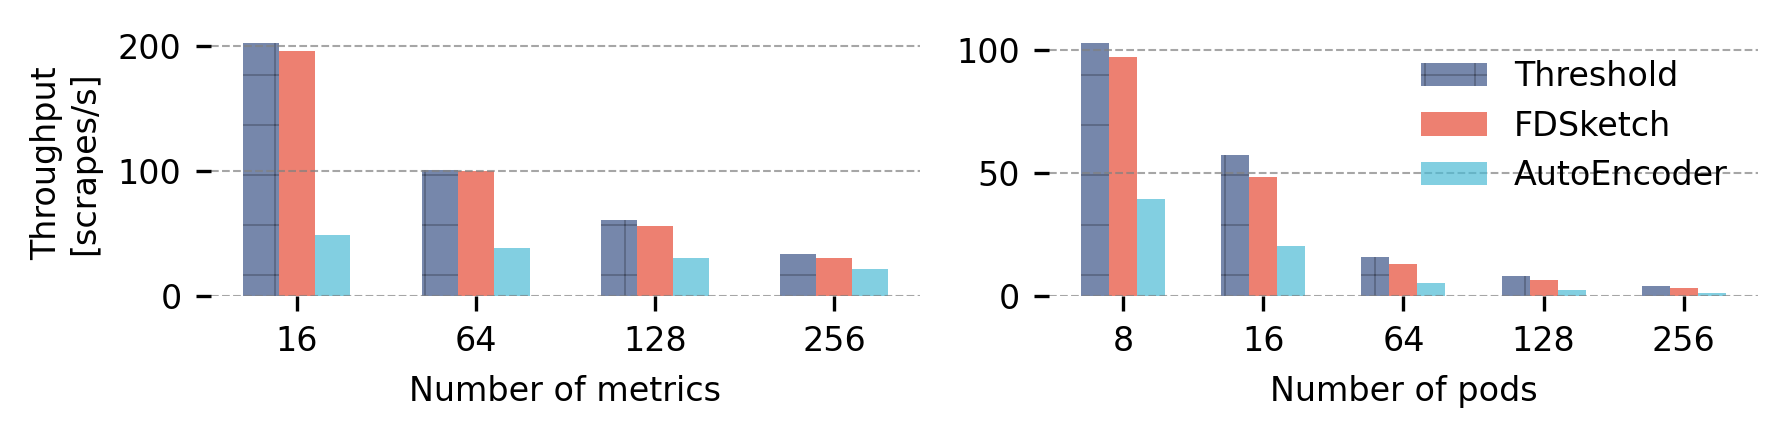

All plots saved to /home/cornaca/uview/64325fe5790118c5c152d25b/figures/plots//


In [20]:
def process_and_plot_dataset(df, plot_type, output_dir, algorithms=None, ax=None):
    """Process a dataset and create both time series and bar plots"""
    # Get all scrape rate columns NOTE the _ at the end !!!
    scrape_rate_cols = [col for col in df.columns if col.startswith('scrape_rate_')]
    
    # Determine the count column based on plot type
    if plot_type == 'metrics':
        x_variable = 'num_metrics'
    else:
        x_variable = 'num_pods'
    
    # Get unique algorithms and counts
    if algorithms is None:
        algorithms = sorted(df['algorithm'].unique())
    else:
        df["algorithm"] = df["algorithm"].map(algorithms)
        algorithms = list(algorithms.values())
    print("Detected algorithms:", algorithms)
    counts = sorted(df[x_variable].unique())

    # Create time series plots
    create_timeseries_plots(df, scrape_rate_cols, algorithms, x_variable, plot_type, output_dir)
    
    # Create bar plots
    create_barplots(df, scrape_rate_cols, algorithms, x_variable, plot_type, output_dir, ax=ax)


def create_timeseries_plots(df, scrape_rate_cols, algorithms, x_variable, plot_type, output_dir):
    """Create time series plots showing scrape rates over time for each LMAP"""
    
    allx = sorted(df[x_variable].unique())
    for algorithm in algorithms:
        for count in allx:
            # Filter data for this algorithm and count
            filtered_df = df[(df['algorithm'] == algorithm) & (df[x_variable] == count)]
            
            if len(filtered_df) == 0:
                continue
                
            # Create a figure
            plt.figure(figsize=(12, 6))
            
            # Plot each LMAP as a separate line
            for _, row in filtered_df.iterrows():
                lmap = row['lmap']
     
                # Extract scrape rates and times
                rates = []
                times = []
                for col in scrape_rate_cols:
                    if pd.notna(row[col]):
                        rates.append(row[col])
                        dt = int(col.split("_")[-1])  # Extract the time from the column name
                        times.append(dt * row["delta_t_seconds"])  # 10 seconds per sample
                
                plt.plot(times, rates, marker='o', label=f'LMAP {lmap}')
            
            # Set plot labels and title
            plt.xlabel('Time (seconds)')
            plt.ylabel('Scrape Rate (scrapes/second)')
            plt.title(f'{algorithm} - {x_variable.split("_")[1].capitalize()}={count}')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.legend()
            plt.tight_layout()
            
            # Save the plot
            save_path = f"{output_dir}/scrape_rate_{plot_type}_{algorithm}_{count}.png"
            plt.savefig(save_path, dpi=300)
            plt.close()




def create_barplots(df, scrape_rate_cols, algorithms, x_variable, plot_type, output_dir, transitory_seconds=60, ax=None):
    """Create bar plots showing average scrape rates with confidence intervals"""
    # Calculate aggregated data for bar plots
    aggregated_data = []
    all_x = sorted(df[x_variable].unique())

    transitory = int(transitory_seconds / df['delta_t_seconds'].iloc[0])  # Convert to number of samples
    
    # TODO make it general
    colors = ['#1B9E77', '#D95F02', '#7570B3']
    colors = ['#3C5488', '#E64B35', '#4DBBD5']
    # colors = ['#AAD8D3', '#00ADB5', '#393E46']  # Charcoal, Teal, Pale cyan
    hatches = ['+', '', '']  # Different hatch patterns for each algorithm

    for i,algorithm in enumerate(algorithms):
        
        for count in all_x:
            # Filter data for this algorithm and count
            filtered_df = df[(df['algorithm'] == algorithm) & (df[x_variable] == count)]
            
            if len(filtered_df) == 0:
                continue
                
            # Collect all rates across all LMAPs and time points
            all_rates = []
            for _, row in filtered_df.iterrows():
                # filtered df here contains only all LMAPs for this number of x value (e..g, num metrics)
                # and this algorithm.
                
                # append all time samples
                # TODO discard the first 10 samples (100 seconds) transient
                rates = [row[col] for col in scrape_rate_cols if pd.notna(row[col]) and int(col.split("_")[-1]) >= transitory]
                # append to all LMAPs
                all_rates.extend(rates)
            
            # Calculate average and standard error
            if all_rates:
                avg_rate = np.mean(all_rates)
                std_error = np.std(all_rates) / np.sqrt(len(all_rates))
                
                aggregated_data.append({
                    'algorithm': algorithm,
                    x_variable: count,
                    'avg_scrape_rate': avg_rate,
                    'std_error': std_error
                })
    
    # Convert to DataFrame
    agg_df = pd.DataFrame(aggregated_data)
    
    # Check if we have data
    if len(agg_df) == 0:
        print(f"No data available for {plot_type} bar plot")
        return
    
    # Create bar plot
    # plot parameter -----------------------------------------------------
    ylabel = 'Throughput\n[scrapes/s]'
    
     
    # Use provided axis or create a new figure
    if ax is None:
        plt.figure(figsize=(3,1.5), dpi=300)
        ax = plt.gca()
    else:
        ax = ax
        
    
    # Define bar width and positions
    bar_width = 0.2
    # --------------------------------------------------------------------------------
    x = np.arange(len(all_x))
    
    # Plot bars for each algorithm
    for i, algorithm in enumerate(algorithms):
        data = agg_df[agg_df['algorithm'] == algorithm]
        
        # Skip if no data for this algorithm
        if len(data) == 0:
            continue
        
        # Prepare data for plotting
        y_values = []
        y_errors = []
        x_positions = []
        
        for j, count in enumerate(all_x):
            count_data = data[data[x_variable] == count]
            if len(count_data) > 0:
                y_values.append(count_data['avg_scrape_rate'].values[0])
                y_errors.append(count_data['std_error'].values[0])
                x_positions.append(j)
        
        # Calculate positions with offset based on algorithm index
        offset = (i - (len(algorithms) - 1) / 2) * bar_width
        positions = np.array(x_positions) + offset
        
        bars = ax.bar(positions, 
               y_values, 
               bar_width, 
            #    yerr=y_errors,
               label=algorithm, 
               alpha=0.7,
               color=colors[i],
               hatch=hatches[i],
               lw=0.5,)
    
    # Set plot labels and title
    ax.set_xlabel(f'Number of {x_variable.split("_")[1]}')
    if YLABEL == '':
        # remove ylabel
        ax.set_ylabel(YLABEL)
    else:
        ax.set_ylabel(ylabel)
    # ax.set_title(f'Local processing only - no Prometheus')
    ax.set_xticks(x)
    ax.set_xticklabels(all_x)
    ax.grid(True, linestyle='--', alpha=0.7, axis='y')
    if LEGEND:
        # Add legend on top of the plot outside tge axis
        ax.legend()
    
    # Remove spines for cleaner look
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
    # plt.tight_layout()
    
    # # Save the plot
    # save_path = f"{output_dir}/avg_scrape_rate_{plot_type}"
    # plt.savefig(f"{save_path}.png", dpi=300, bbox_inches='tight', pad_inches=0.)
    # plt.savefig(f"{save_path}.pdf", dpi=300, bbox_inches='tight', pad_inches=0.)
    # plt.show()
    # plt.close()
    return ax


#----------------------------------------------------------------------
"""Main function to plot RDMA benchmark results"""
# Load CSV files
metrics_df = pd.read_csv(f"{BASE_DIR}read_loop_vs_metrics.csv")
pods_df = pd.read_csv(f"{BASE_DIR}read_loop_vs_pods.csv")

import os
# Create output directory
output_dir = f'{PAPER_DIR}'
os.makedirs(output_dir, exist_ok=True)

plot_algos = {
    "TH": "Threshold",
    "FD": "FDSketch",
    "VAE": "AutoEncoder"
}

import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.1


# Create a single figure with two subplots for metrics and pods data
fig, (ax_metrics, ax_pods) = plt.subplots(1, 2, figsize=(6, 1.5), dpi=300)

LEGEND=False

# YLABEL='Tput\n[scrapes/s]'
YLABEL='Tput\n[scrape/s]'
# Process metrics data
process_and_plot_dataset(metrics_df, "metrics", output_dir, algorithms=plot_algos, ax=ax_metrics)

LEGEND=True
YLABEL=''
# Process pods data
process_and_plot_dataset(pods_df, "pods", output_dir, algorithms=plot_algos, ax=ax_pods)

plt.tight_layout()
    
# Save the plot
save_path = f"{output_dir}/avg_scrape_rate"
plt.savefig(f"{save_path}.png", dpi=300, bbox_inches='tight', pad_inches=0.)
plt.savefig(f"{save_path}.pdf", dpi=300, bbox_inches='tight', pad_inches=0.)
plt.show()
plt.close()

print(f"All plots saved to {output_dir}/")